In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import keras

2024-06-06 11:31:26.366314: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-06 11:31:26.366418: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-06 11:31:26.495688: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
data_dir = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"
diseases = os.listdir(train_dir)

# Data preprocessing

### Training set

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred", #will generate labels from the directory structure
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation set

In [5]:
validation_set  = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    labels="inferred", #will generate labels from the directory structure
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [6]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [7]:
#for x,y in training_set: #(shape 32, 128,128) because batchsize is 32 so we treat 32 images at each iteration
#    print(x,x.shape)
#    print(y,y.shape)
#    break

# Building Model

In [8]:
from tensorflow.keras.layers import Dense, Conv2D,MaxPool2D,Flatten, Dropout
from tensorflow.keras.models import Sequential

In [9]:
model=Sequential()

## Building Convolution Layer

In [10]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Dropout(0.25))
#limit overfitting because we added more convolution layers and this lead to overfit the modellll

In [16]:
model.add(Flatten())

In [17]:
model.add(Dense(units=1500,activation='relu')) #units mean the number of neurons

In [18]:
model.add(Dropout(0.4))

## Output layer

In [19]:
model.add(Dense(units=38,activation='softmax')) #softmax give a probability for each class the summ is equal to 1

# Compiling Model

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

#small learning rate to avoid overshooting

### Model Training


In [21]:
# model = model.fit(x=training_set, validation_data=validation_set,epochs=10) 

## Load Model

In [22]:
from keras.models import load_model

# Path to the uploaded model file, MODIFY YOUR PATH, click on the copy icon when hovering over the file before pasting it underneath
model_path = "/kaggle/input/trained_model/keras/trained_model.keras/1/trained_model.keras"

# Load the model
model = load_model(model_path)

# Verify the model by printing its summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,528,288 (89.75 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,685,526 (59.84 MB)

## Load Training history

In [23]:
import json

# Path to the uploaded JSON file, once again, MODIFY THE PATH accordingly
json_path = "/kaggle/input/training_hist/keras/training_hist/1/training_hist.json"

# Load the JSON file
with open(json_path, "r") as f:
    training_history = json.load(f) #`training_history` is a dictionary containing the training history

In [24]:
# Convert the dictionary to a DataFrame
df = pd.DataFrame(training_history)

# Display the DataFrame
print(df)

   accuracy      loss  val_accuracy  val_loss
0  0.597511  1.368345      0.828591  0.536794
1  0.852678  0.466431      0.904962  0.294725
2  0.910520  0.279370      0.917198  0.258352
3  0.935515  0.198835      0.926417  0.238459
4  0.952500  0.143621      0.947815  0.171103
5  0.961818  0.114221      0.954188  0.155603
6  0.970211  0.093322      0.940929  0.211942
7  0.974778  0.076893      0.959879  0.134569
8  0.978220  0.066908      0.957489  0.158202
9  0.979885  0.063016      0.960335  0.142515


# Model Evaluation

### Model Evaluation on Training set

In [25]:
train_loss,train_acc = model.evaluate(training_set)

   7/2197 ━━━━━━━━━━━━━━━━━━━━ 52s 24ms/step - accuracy: 0.9708 - loss: 0.0744

I0000 00:00:1717673535.269633      78 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1717673535.288594      78 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 96s 41ms/step - accuracy: 0.9879 - loss: 0.0332


W0000 00:00:1717673625.247138      80 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [26]:
print(f'Accuracy: {train_acc:.4f}')
print(f'Loss: {train_loss:.4f}')

Accuracy: 0.9875
Loss: 0.0344


### Model Evaluation on Validation set

In [27]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.9566 - loss: 0.1571


In [28]:
print(f'Accuracy: {val_acc:.4f}')
print(f'Loss: {val_loss:.4f}')

Accuracy: 0.9603
Loss: 0.1425


# Saving Model

In [29]:
# model.save("/kaggle/working/trained_model.keras")

In [30]:
#model.history

In [31]:
# #Recording History in json
# import json
# with open("/kaggle/working/training_hist.json", "w") as f:
#     json.dump(model.history,f)

# Accuracy Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

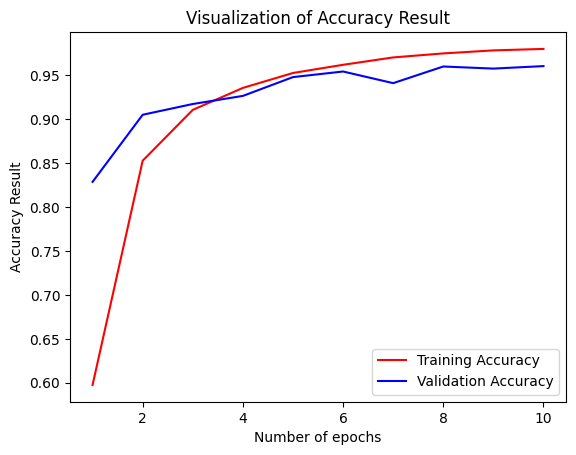

In [32]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs,training_history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show

# Some other metrics for model evaluation

In [33]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [34]:
test_set = tf.keras.utils.image_dataset_from_directory( #we use the valid data to create the test set to calculate some other metrics, because the test set doesnt contain the 38 class
    valid_dir,
    labels="inferred", #will generate labels from the directory structure
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False, # we want to past categories sequentially
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [35]:
y_pred=model.predict(test_set)
y_pred, y_pred.shape #shape is 38 because we used softmax which means it gives a probability for each class

 13/550 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step

W0000 00:00:1717673659.947248      78 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


550/550 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step


(array([[9.9999976e-01, 8.4754931e-10, 1.0682700e-10, ..., 1.7258925e-14,
         1.7877598e-14, 3.7875081e-12],
        [1.0000000e+00, 7.1126789e-09, 5.2708716e-14, ..., 1.2583472e-19,
         2.2778350e-18, 2.0085134e-16],
        [1.0000000e+00, 1.7619996e-13, 1.4744411e-15, ..., 5.6355040e-25,
         2.7174426e-22, 8.8117400e-18],
        ...,
        [2.6286044e-09, 1.8836818e-12, 2.7800375e-09, ..., 1.9732178e-10,
         1.4747257e-11, 9.9999464e-01],
        [7.3437974e-12, 5.6819182e-16, 7.6378409e-12, ..., 4.1727312e-13,
         2.9344723e-13, 1.0000000e+00],
        [4.5449433e-14, 4.9765855e-14, 1.7748429e-13, ..., 1.7955819e-14,
         8.0994959e-12, 9.9999952e-01]], dtype=float32),
 (17572, 38))

In [36]:
predicted_categories=tf.argmax(y_pred,axis=1) #axis 0 will do vertically we dont want that, we use argmax to take the max prob colonwise
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [37]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [38]:
Y_true=tf.argmax(true_categories,axis=1)#return index
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

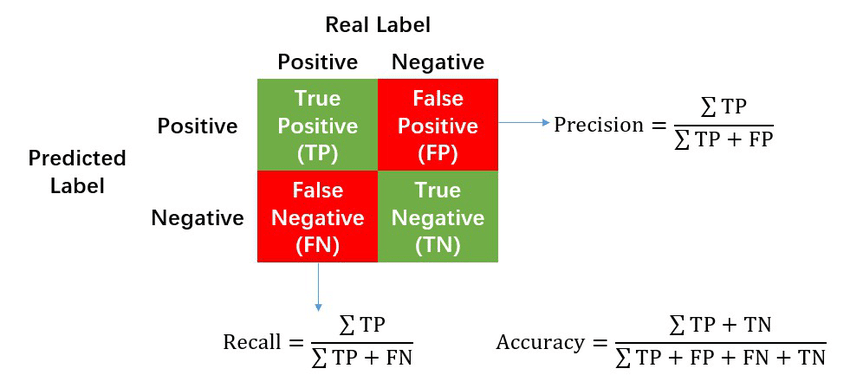

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.92      0.98      0.95       504
                                 Apple___Black_rot       0.98      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.99      0.93      0.96       440
                                   Apple___healthy       0.98      0.91      0.94       502
                               Blueberry___healthy       0.97      0.97      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.97      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.90      0.94      0.92       410
                       Corn_(maize)___Common_rust_       1.00      0.98      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.94      0.

In [41]:
cm=confusion_matrix(Y_true,predicted_categories)
cm

array([[492,   1,   0, ...,   0,   0,   0],
       [  1, 493,   0, ...,   0,   0,   0],
       [  1,   0, 407, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 467,   0,   0],
       [  0,   0,   0, ...,   0, 441,   0],
       [  0,   0,   0, ...,   0,   0, 461]])

# Confusion Matrix Visualization

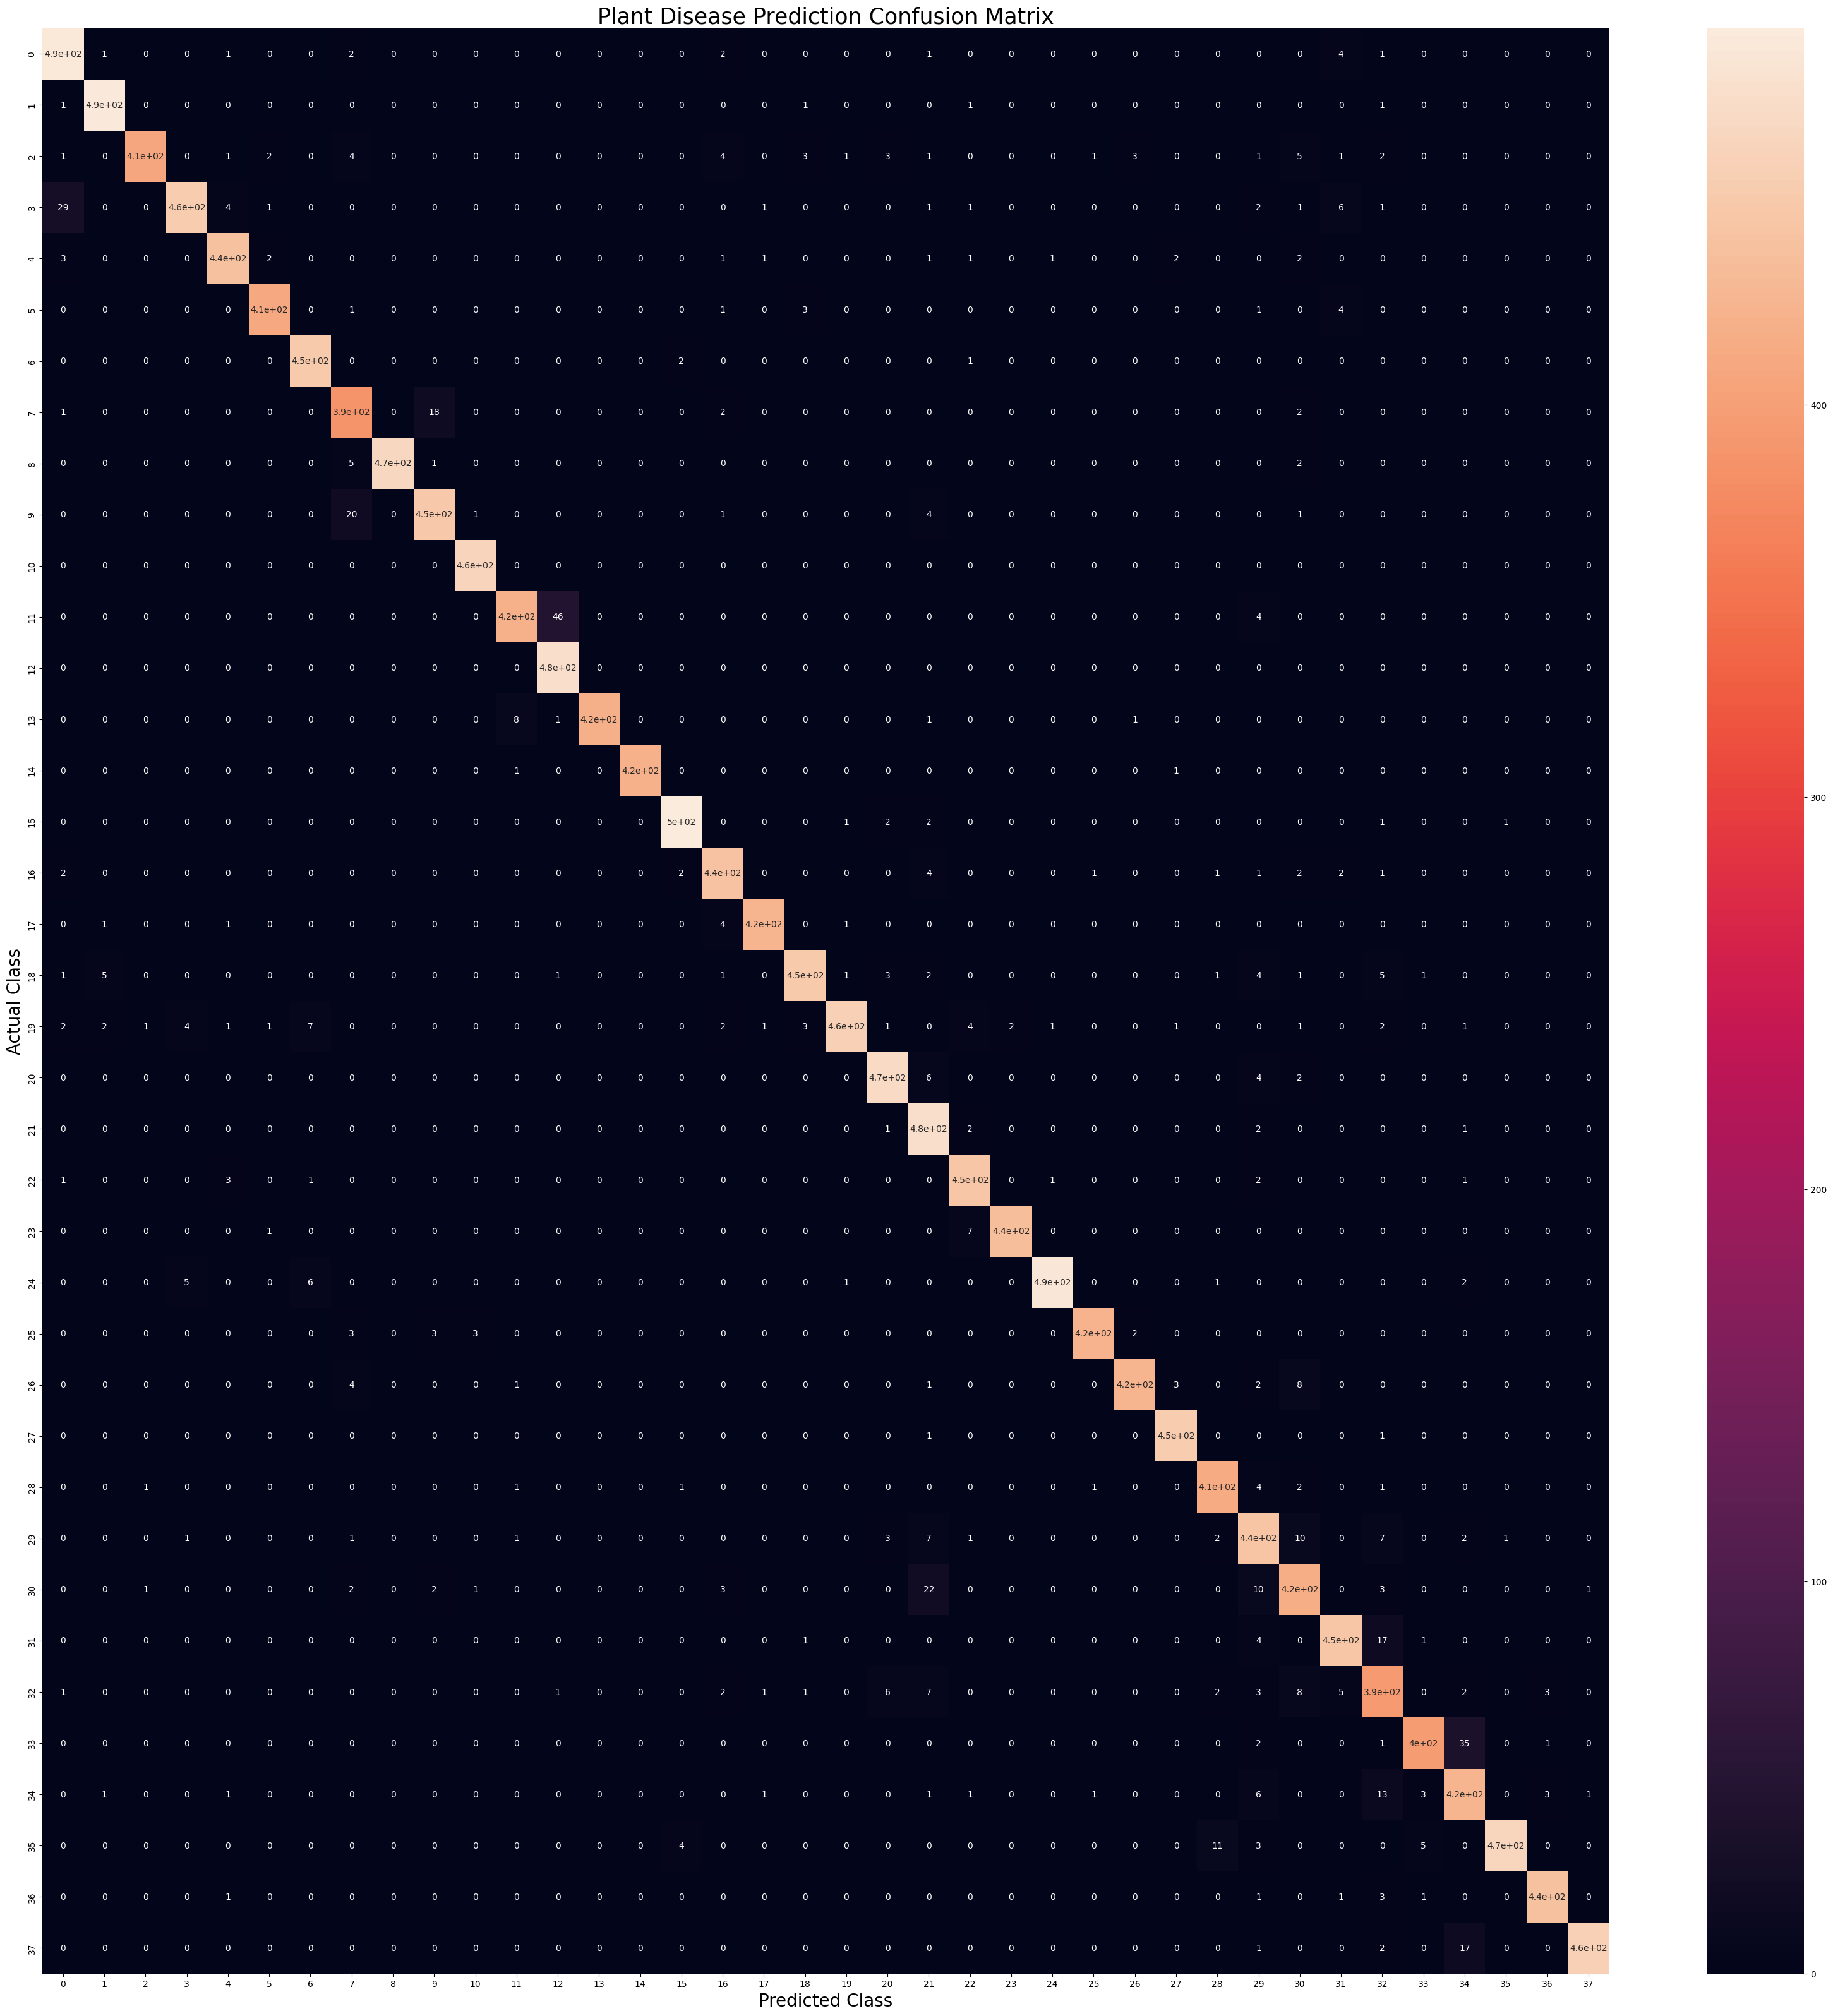

In [42]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()

# Testing Model

### Testing model on 1 image

In [43]:
import cv2

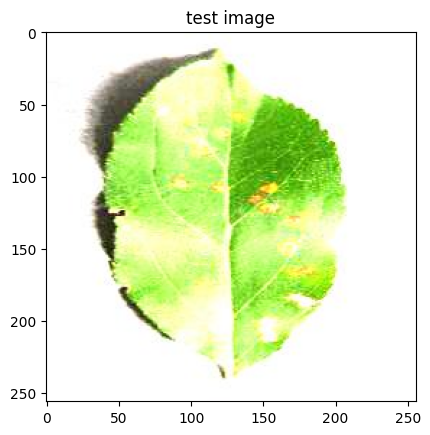

In [44]:
image_path="/kaggle/input/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG"
#read imaage
img=cv2.imread(image_path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #cv2 load image in bgr format in default so we convert to rgb
#display image
plt.imshow(img)
plt.title("test image")

plt.show()

In [45]:
image=tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr=tf.keras.preprocessing.image.img_to_array(image)
input_arr=np.array([input_arr]) #to make the test set in the form of the batch like the training set/ convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [46]:
prediction=model.predict(input_arr)
prediction.shape, prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


((1, 38),
 array([[1.0303506e-08, 1.6903252e-08, 9.9968708e-01, 1.3356145e-09,
         1.2704102e-07, 2.3532680e-06, 2.7953995e-11, 4.5880833e-07,
         1.7650518e-11, 1.6356896e-09, 4.1407161e-13, 2.4954527e-08,
         4.3817932e-09, 1.5944583e-10, 2.0010243e-10, 1.0804229e-07,
         1.8260582e-05, 3.6091681e-08, 1.9578360e-07, 1.3299287e-08,
         2.3833804e-09, 1.1660446e-08, 1.6367101e-09, 3.0552161e-10,
         7.0531445e-12, 3.2293526e-10, 2.2753786e-09, 1.9775157e-10,
         2.3322355e-04, 1.5270913e-05, 3.7351227e-05, 3.6178040e-08,
         3.3535841e-07, 3.4633358e-09, 4.8655079e-06, 8.8256265e-08,
         6.7717231e-08, 1.0966017e-08]], dtype=float32))

In [47]:
result_index=np.argmax(prediction)
print("Result index:",result_index)
print("Result class:", class_name[result_index])

Result index: 2
Result class: Apple___Cedar_apple_rust


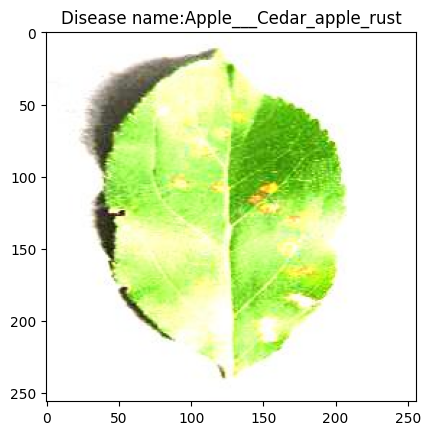

In [48]:
#display result of disease prediction

model_prediction=class_name[result_index]

plt.imshow(img)
plt.title(f"Disease name:{model_prediction}")

plt.show()

### Testing model on all test directory

In [49]:
# Test directory path
test_dir = "/kaggle/input/new-plant-diseases-dataset/test/test"

In [50]:
# Fonction pour charger et prétraiter les images
def load_and_preprocess_image(image_path):
    image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
    input_arr=tf.keras.preprocessing.image.img_to_array(image)
    return image

In [51]:
# Dictionnaire pour mapper les noms de fichiers aux classes
file_to_class = {
    "AppleCedarRust1.JPG": "Apple___Cedar_apple_rust",
    "AppleCedarRust2.JPG": "Apple___Cedar_apple_rust",
    "AppleCedarRust3.JPG": "Apple___Cedar_apple_rust",
    "AppleCedarRust4.JPG": "Apple___Cedar_apple_rust",
    "AppleScab1.JPG": "Apple___Apple_scab",
    "AppleScab2.JPG": "Apple___Apple_scab",
    "AppleScab3.JPG": "Apple___Apple_scab",
    "CornCommonRust1.JPG": "Corn_(maize)___Common_rust_",
    "CornCommonRust2.JPG": "Corn_(maize)___Common_rust_",
    "CornCommonRust3.JPG": "Corn_(maize)___Common_rust_",
    "PotatoEarlyBlight1.JPG": "Potato___Early_blight",
    "PotatoEarlyBlight2.JPG": "Potato___Early_blight",
    "PotatoEarlyBlight3.JPG": "Potato___Early_blight",
    "PotatoEarlyBlight4.JPG": "Potato___Early_blight",
    "PotatoEarlyBlight5.JPG": "Potato___Early_blight",
    "PotatoHealthy1.JPG": "Potato___healthy",
    "PotatoHealthy2.JPG": "Potato___healthy",
    "TomatoEarlyBlight1.JPG": "Tomato___Early_blight",
    "TomatoEarlyBlight2.JPG": "Tomato___Early_blight",
    "TomatoEarlyBlight3.JPG": "Tomato___Early_blight",
    "TomatoEarlyBlight4.JPG": "Tomato___Early_blight",
    "TomatoEarlyBlight5.JPG": "Tomato___Early_blight",
    "TomatoEarlyBlight6.JPG": "Tomato___Early_blight",
    "TomatoHealthy1.JPG": "Tomato___healthy",
    "TomatoHealthy2.JPG": "Tomato___healthy",
    "TomatoHealthy3.JPG": "Tomato___healthy",
    "TomatoHealthy4.JPG": "Tomato___healthy",
    "TomatoYellowCurlVirus1.JPG": "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "TomatoYellowCurlVirus2.JPG": "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "TomatoYellowCurlVirus3.JPG": "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "TomatoYellowCurlVirus4.JPG": "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "TomatoYellowCurlVirus5.JPG": "Tomato___Tomato_Yellow_Leaf_Curl_Virus",
    "TomatoYellowCurlVirus6.JPG": "Tomato___Tomato_Yellow_Leaf_Curl_Virus"
}

In [52]:
# Lister tous les fichiers dans le répertoire de test
test_files = os.listdir(test_dir)

In [53]:
# Listes pour les prédictions et les vraies étiquettes
predictions = []
true_labels = []

# Faire des prédictions pour chaque fichier d'image
for file in test_files:
    image_path = os.path.join(test_dir, file)
    image = load_and_preprocess_image(image_path)
    input_arr = np.expand_dims(image, axis=0)  # Convertir en batch
    prediction = model.predict(input_arr)
    predicted_class = np.argmax(prediction)
    true_class = class_name.index(file_to_class[file])
    
    predictions.append(predicted_class)
    true_labels.append(true_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━

In [54]:
from sklearn.metrics import accuracy_score
# Calculer l'accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8485
